In [18]:
import pandas as pd
from prophet import Prophet
import matplotlib.pyplot as plt

df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/datasets/sunup_sundown_data.csv')

df['Date'] = pd.to_datetime(df['Date'])
df.rename(columns={'Date': 'ds', 'Sunup': 'y'}, inplace=True)

df['time'] = pd.to_datetime(df['y'])
df['y'] = df['time'].dt.hour*60 + df['time'].dt.minute

df.drop(['City', 'Sundown', 'time'], axis=1, inplace=True)
df.head(10)


<ipython-input-18-74f11ab62187>:10: UserWarning:

Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.



,ds,y
0,2010-01-01,471
1,2010-01-02,471
2,2010-01-03,471
3,2010-01-04,471
4,2010-01-05,471
5,2010-01-06,470
6,2010-01-07,470
7,2010-01-08,470
8,2010-01-09,470
9,2010-01-10,469


In [19]:
df.shape

(4018, 2)

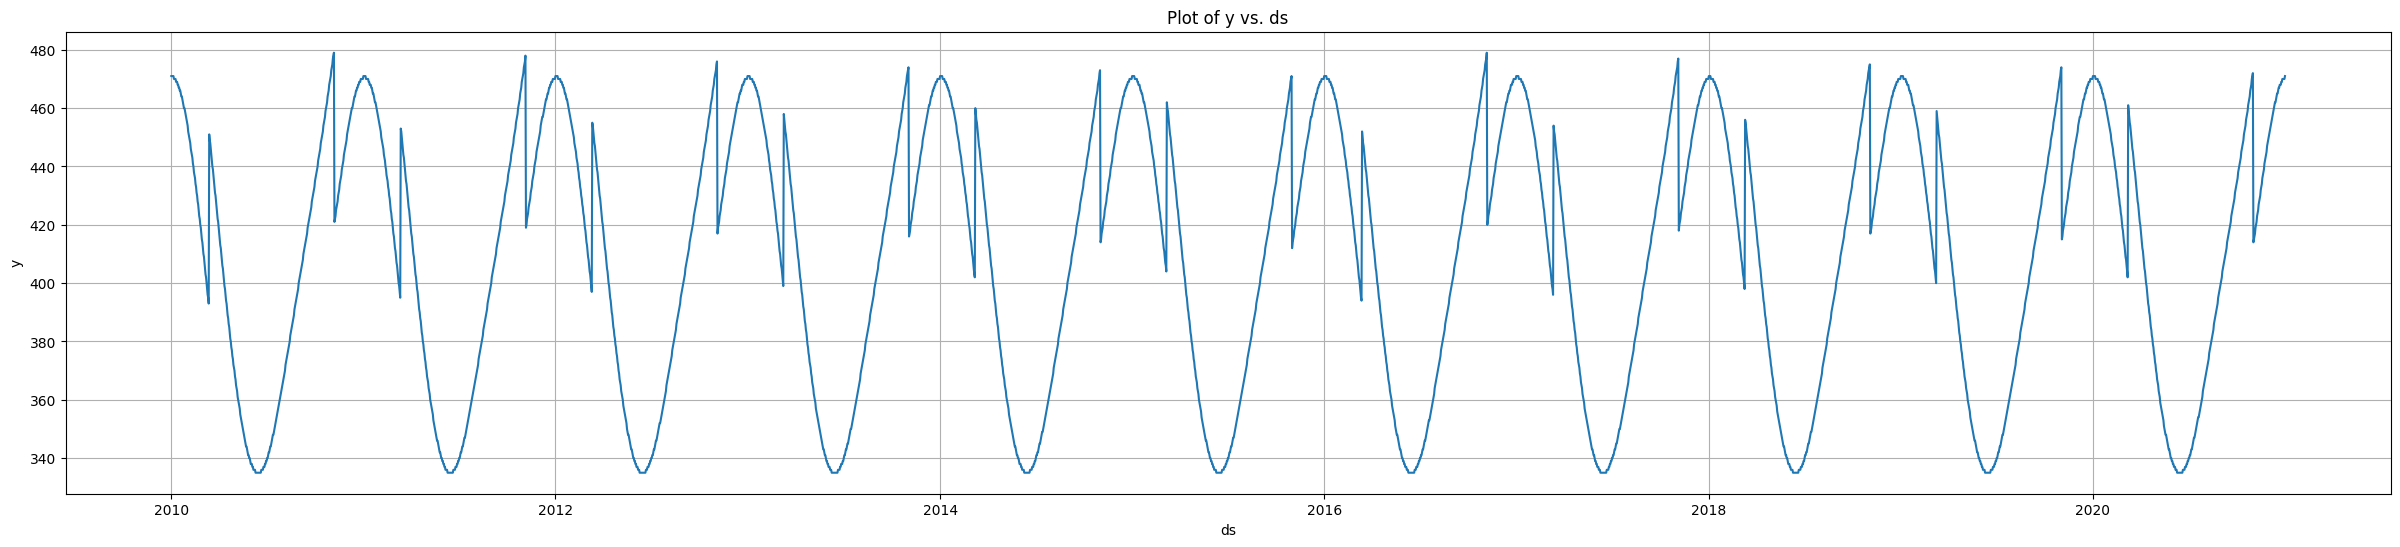

In [20]:
plt.figure(figsize=(30, 6))
plt.plot(df['ds'], df['y'])
plt.xlabel('ds')
plt.ylabel('y')
plt.title('Plot of y vs. ds')
plt.grid(True)
plt.show()


In [21]:
model = Prophet()
model.fit(df)

INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpevpze8bp/nbkw1vqg.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpevpze8bp/alk4hmlu.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=12186', 'data', 'file=/tmp/tmpevpze8bp/nbkw1vqg.json', 'init=/tmp/tmpevpze8bp/alk4hmlu.json', 'output', 'file=/tmp/tmpevpze8bp/prophet_model_kftsyz3/prophet_model-20250312044421.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
04:44:21 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
04:44:22 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


In [22]:
future = model.make_future_dataframe(periods=365)
forecast = model.predict(future)
future.shape

(4383, 1)

In [23]:
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

,ds,yhat,yhat_lower,yhat_upper
4378,2021-12-27,468.629240,460.731961,476.018586
4379,2021-12-28,469.143885,461.280616,477.309040
4380,2021-12-29,469.631651,461.965867,477.786298
4381,2021-12-30,470.097680,462.297024,477.584243
4382,2021-12-31,470.507808,462.819655,478.456629


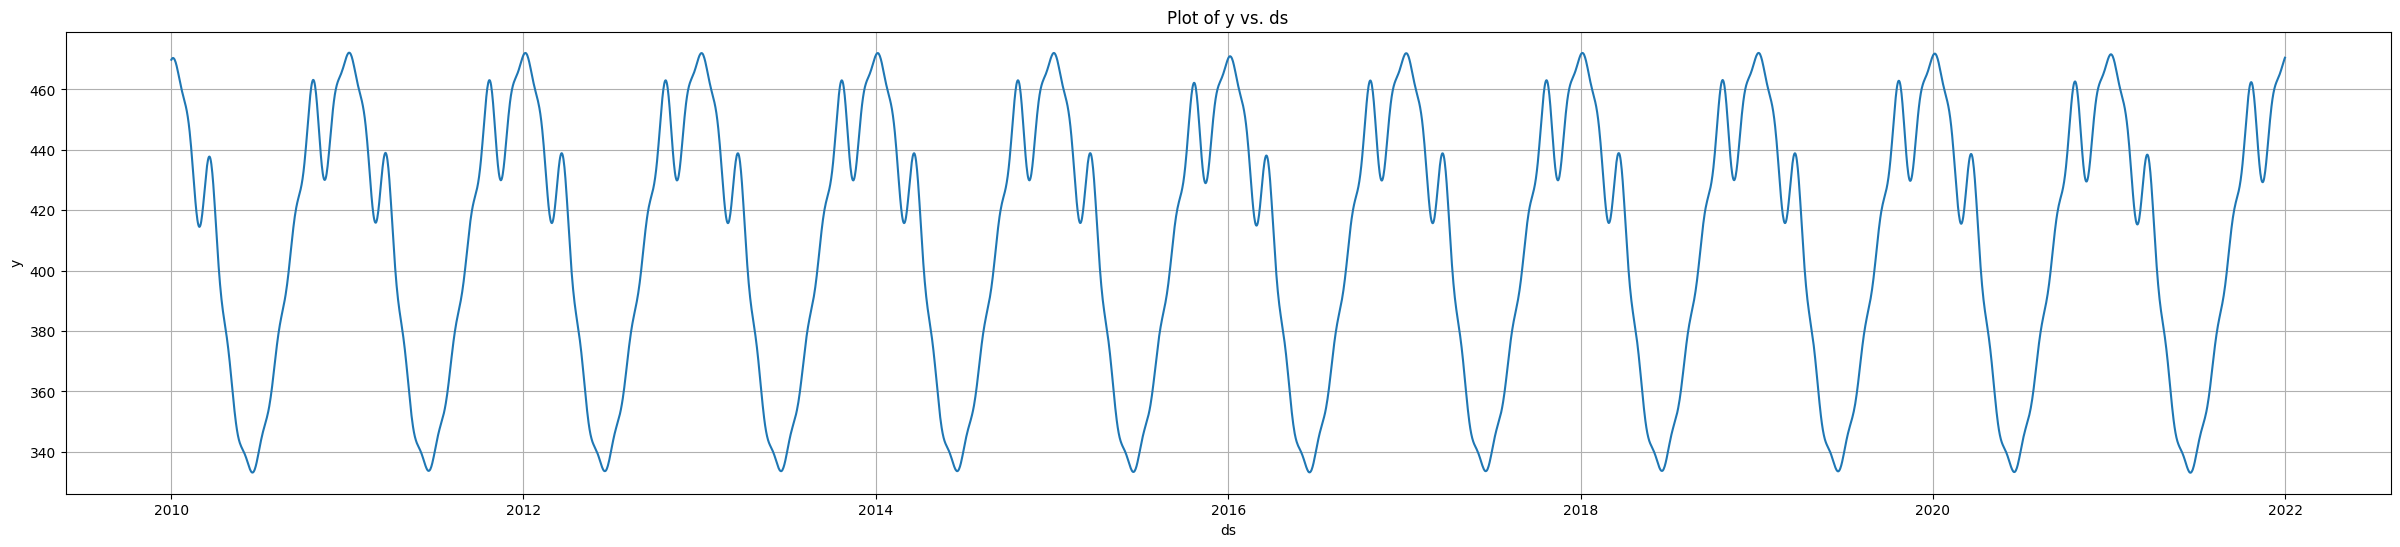

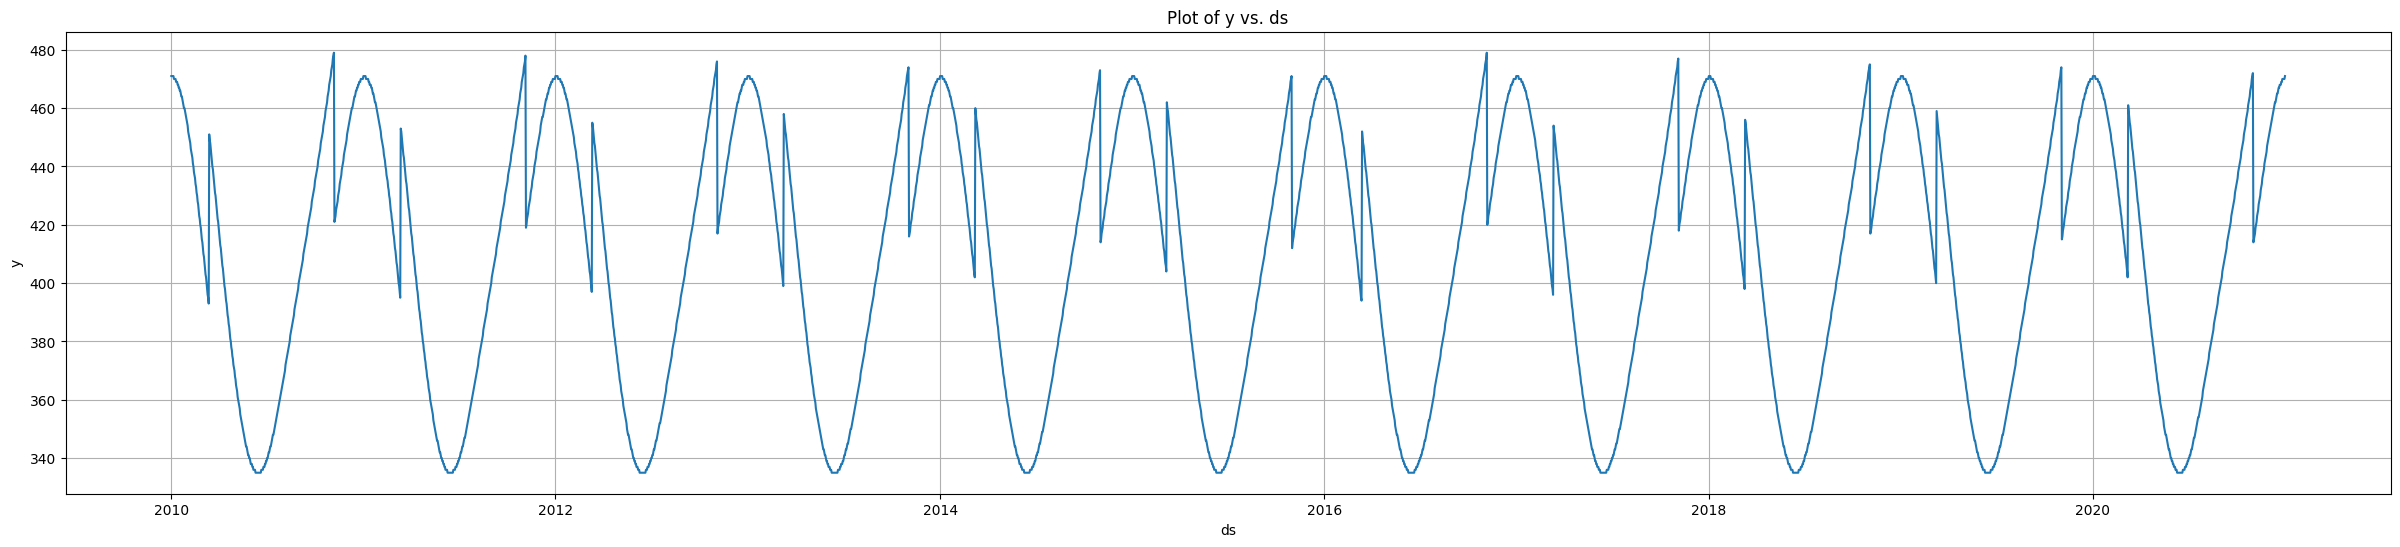

In [24]:
plt.figure(figsize=(30, 6))
plt.plot(forecast['ds'], forecast['yhat'])
plt.xlabel('ds')
plt.ylabel('y')
plt.title('Plot of y vs. ds')
plt.grid(True)
plt.show()

plt.figure(figsize=(30, 6))
plt.plot(df['ds'], df['y'])
plt.xlabel('ds')
plt.ylabel('y')
plt.title('Plot of y vs. ds')
plt.grid(True)
plt.show()


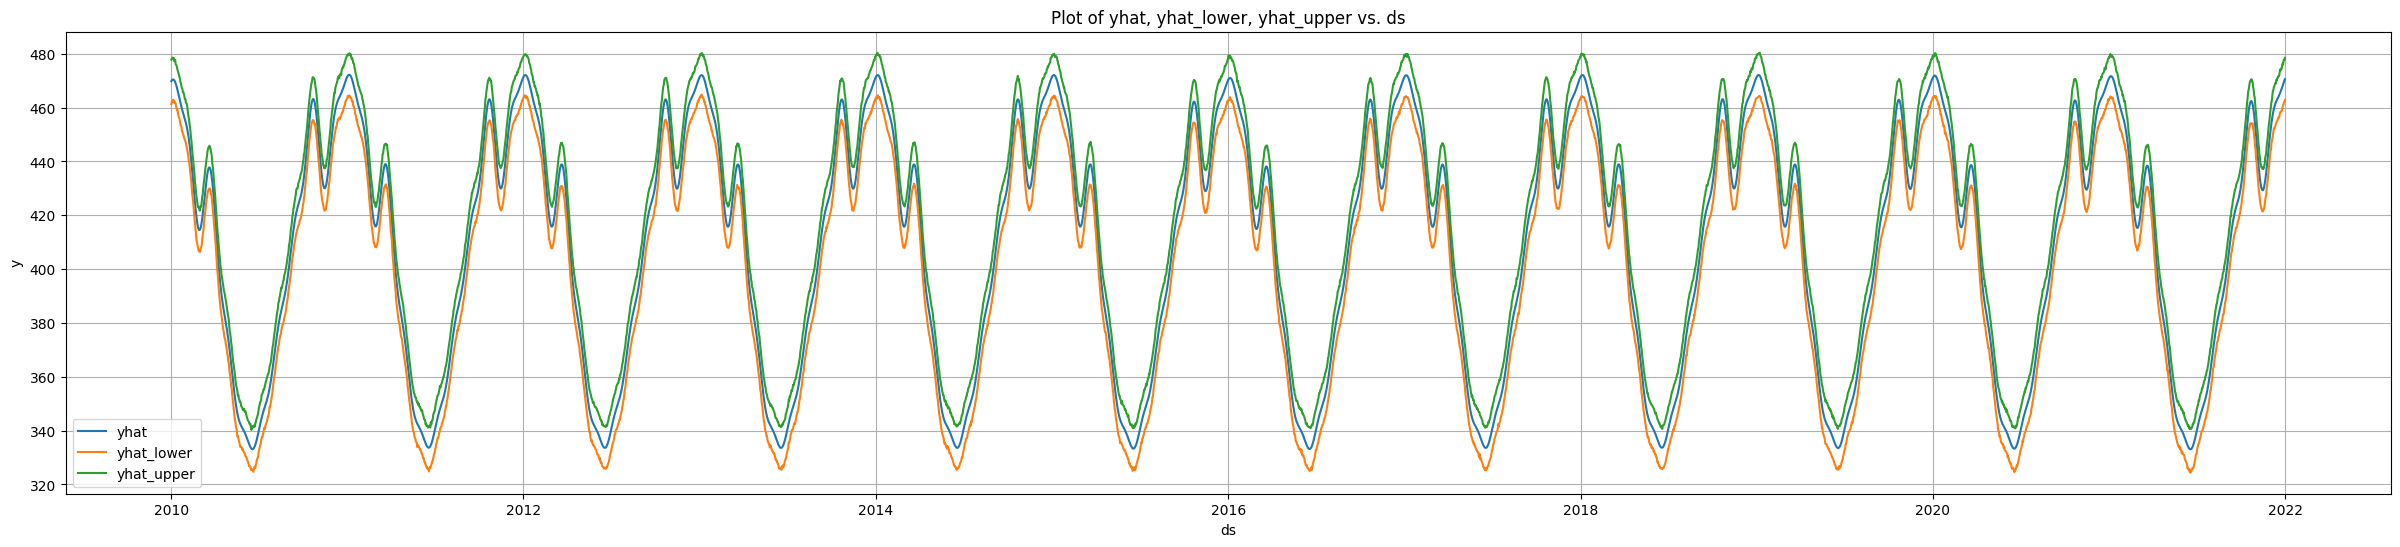

In [25]:
plt.figure(figsize=(30, 6))
plt.plot(forecast['ds'], forecast['yhat'], label='yhat')
plt.plot(forecast['ds'], forecast['yhat_lower'], label='yhat_lower')
plt.plot(forecast['ds'], forecast['yhat_upper'], label='yhat_upper')
plt.xlabel('ds')
plt.ylabel('y')
plt.title('Plot of yhat, yhat_lower, yhat_upper vs. ds')
plt.grid(True)
plt.legend()
plt.show()


In [26]:
from prophet.plot import plot_plotly, plot_components_plotly

plot_plotly(model, forecast)

In [27]:
plot_components_plotly(model, forecast)

/usr/local/lib/python3.11/dist-packages/plotly/io/_json.py:560: UserWarning:

Discarding nonzero nanoseconds in conversion.

